# Analiza DMD (Dynamic Mode Decomposition)

## Wariant 11

Na podstawie danych o dynamicznych stanach układu w macierzach **X** oraz **X'** obliczyć na podstawie metody DMD przybliżoną macierz przekształcenia **A**.

### Teoria DMD

Dynamic Mode Decomposition zakłada, że dane można opisać liniowym układem dynamicznym:

$$X' = A \cdot X$$

gdzie:
- $X$ - macierz stanów w chwilach $t_0, t_1, ..., t_{n-1}$
- $X'$ - macierz stanów w chwilach $t_1, t_2, ..., t_n$
- $A$ - macierz przekształcenia (operator dynamiki)

Macierz $A$ można wyznaczyć jako:

$$A = X' \cdot X^+$$

gdzie $X^+$ to pseudoodwrotność Moore'a-Penrose'a macierzy $X$.

In [1]:
# Importy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=False)
print("Biblioteki załadowane")

Biblioteki załadowane


## 1. Wczytanie danych

In [2]:
# Wczytaj dane z plików CSV
# Pliki używają średnika jako separatora i przecinka jako separatora dziesiętnego

X_df = pd.read_csv('War11_X.csv', sep=';', header=None, decimal=',')
Xprime_df = pd.read_csv('War11_Xprime.csv', sep=';', header=None, decimal=',')

print(f"Kształt X: {X_df.shape}")
print(f"Kształt X': {Xprime_df.shape}")

Kształt X: (23, 36)
Kształt X': (23, 36)


In [3]:
# Konwersja na macierze numpy
X = X_df.values
Xprime = Xprime_df.values

print(f"Macierz X:")
print(f"  Wymiary: {X.shape}")
print(f"  Typ danych: {X.dtype}")
print(f"  Zakres wartości: [{X.min():.2e}, {X.max():.2e}]")

print(f"\nMacierz X':")
print(f"  Wymiary: {Xprime.shape}")
print(f"  Typ danych: {Xprime.dtype}")
print(f"  Zakres wartości: [{Xprime.min():.2e}, {Xprime.max():.2e}]")

Macierz X:
  Wymiary: (23, 36)
  Typ danych: float64
  Zakres wartości: [1.00e+00, 1.58e+38]

Macierz X':
  Wymiary: (23, 36)
  Typ danych: float64
  Zakres wartości: [1.06e+02, 1.80e+39]


In [4]:
# Podgląd pierwszych wierszy
print("Pierwsze 3 wiersze X:")
print(X[:3, :5])  # Pierwsze 5 kolumn

print("\nPierwsze 3 wiersze X':")
print(Xprime[:3, :5])

Pierwsze 3 wiersze X:
[[1.000000e+00 1.444066e+02 1.675606e+03 1.927353e+04 2.204099e+05]
 [2.000000e+00 1.619534e+02 1.677816e+03 1.926336e+04 2.198365e+05]
 [3.000000e+00 1.201634e+02 1.502758e+03 1.704022e+04 1.947517e+05]]

Pierwsze 3 wiersze X':
[[1.444066e+02 1.675606e+03 1.927353e+04 2.204099e+05 2.519445e+06]
 [1.619534e+02 1.677816e+03 1.926336e+04 2.198365e+05 2.513006e+06]
 [1.201634e+02 1.502758e+03 1.704022e+04 1.947517e+05 2.226007e+06]]


## 2. Obliczenie macierzy A metodą DMD

### Metoda 1: Pseudoodwrotność (bezpośrednia)

$$A = X' \cdot X^+$$

gdzie $X^+ = (X^T X)^{-1} X^T$ lub używamy `np.linalg.pinv()`

In [5]:
# Metoda 1: Bezpośrednia pseudoodwrotność
# A = X' * X^+

X_pinv = np.linalg.pinv(X)
A_direct = Xprime @ X_pinv

print(f"Macierz A (metoda bezpośrednia):")
print(f"  Wymiary: {A_direct.shape}")
print(f"  Zakres wartości: [{A_direct.min():.6f}, {A_direct.max():.6f}]")

Macierz A (metoda bezpośrednia):
  Wymiary: (23, 23)
  Zakres wartości: [-21.123317, 22.464112]


### Metoda 2: Przez SVD (bardziej stabilna numerycznie)

1. Oblicz SVD: $X = U \Sigma V^T$
2. Pseudoodwrotność: $X^+ = V \Sigma^{-1} U^T$
3. Macierz A: $A = X' V \Sigma^{-1} U^T$

In [6]:
# Metoda 2: Przez SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f"SVD rozkład:")
print(f"  U: {U.shape}")
print(f"  S (wartości singularne): {S.shape}")
print(f"  Vt: {Vt.shape}")

# Sprawdź wartości singularne
print(f"\nPierwsze 10 wartości singularnych:")
print(S[:10])

SVD rozkład:
  U: (23, 23)
  S (wartości singularne): (23,)
  Vt: (23, 36)

Pierwsze 10 wartości singularnych:
[6.252706e+38 2.164712e+32 8.532267e+30 9.580657e+29 3.066195e+28
 1.423083e+27 1.005601e+26 1.255532e+25 9.907187e+23 1.229542e+23]


In [7]:
# Oblicz A przez SVD
# A = X' * V * Sigma^(-1) * U^T

# Odwrotność wartości singularnych (z progowaniem dla stabilności)
threshold = 1e-10 * S.max()
S_inv = np.array([1/s if s > threshold else 0 for s in S])

# A = Xprime @ V @ diag(S_inv) @ U.T
A_svd = Xprime @ Vt.T @ np.diag(S_inv) @ U.T

print(f"Macierz A (metoda SVD):")
print(f"  Wymiary: {A_svd.shape}")
print(f"  Zakres wartości: [{A_svd.min():.6f}, {A_svd.max():.6f}]")

Macierz A (metoda SVD):
  Wymiary: (23, 23)
  Zakres wartości: [-3.688529, 4.703218]


In [8]:
# Porównanie obu metod
diff = np.abs(A_direct - A_svd)
print(f"Różnica między metodami:")
print(f"  Max różnica: {diff.max():.2e}")
print(f"  Średnia różnica: {diff.mean():.2e}")

Różnica między metodami:
  Max różnica: 2.19e+01
  Średnia różnica: 1.70e+00


## 3. Wynikowa macierz A

In [9]:
# Używamy macierzy z metody SVD jako bardziej stabilnej
A = A_svd

print("=" * 60)
print("MACIERZ PRZEKSZTAŁCENIA A (DMD)")
print("=" * 60)
print(f"\nWymiary: {A.shape}")
print(f"\nMacierz A:")
print(A)

MACIERZ PRZEKSZTAŁCENIA A (DMD)

Wymiary: (23, 23)

Macierz A:
[[ 3.523743e+00 -1.358566e+00  2.219261e+00 -7.554522e-01  2.760899e-01
   3.823677e+00  1.427714e+00  1.833221e+00  7.316445e-01  9.887322e-01
  -3.264539e+00  4.703218e+00  5.564148e-01 -4.228190e-01 -3.231232e-01
  -3.404978e+00 -1.683767e-01  1.890748e+00  2.561674e+00 -5.218737e-01
   1.746250e+00  1.514422e+00 -3.239688e+00]
 [ 2.619446e+00 -1.672301e+00  3.103559e-01 -5.342862e-01  3.286401e+00
   9.116462e-01  1.512785e+00  8.837394e-01  1.177881e+00  6.371301e-01
  -2.487650e+00  1.793741e+00  9.330749e-01 -8.827973e-01 -3.218002e-01
  -1.641964e+00  1.151094e+00 -7.752373e-01  1.192294e+00  4.917850e-01
   9.352420e-01  1.340333e+00  1.478536e+00]
 [ 3.460305e+00 -2.077068e+00  1.268131e+00 -9.698448e-01  1.941851e+00
   2.655228e+00  1.680450e+00  1.481044e+00  1.073580e+00  8.156555e-01
  -3.688529e+00  3.708089e+00  8.160485e-01 -9.781202e-01 -5.878767e-01
  -3.204107e+00  5.453833e-01  4.616516e-01  2.040647e+

## 4. Weryfikacja wyniku

Sprawdzamy czy $X' \approx A \cdot X$

In [10]:
# Weryfikacja: X' ≈ A * X
Xprime_reconstructed = A @ X

# Błąd rekonstrukcji
error = Xprime - Xprime_reconstructed
relative_error = np.abs(error) / (np.abs(Xprime) + 1e-10)

print("Weryfikacja rekonstrukcji X' = A * X:")
print(f"  Błąd bezwzględny (max): {np.abs(error).max():.2e}")
print(f"  Błąd bezwzględny (średni): {np.abs(error).mean():.2e}")
print(f"  Błąd względny (max): {relative_error.max():.2%}")
print(f"  Błąd względny (średni): {relative_error.mean():.2%}")

# Norma Frobeniusa
frobenius_error = np.linalg.norm(error, 'fro')
frobenius_Xprime = np.linalg.norm(Xprime, 'fro')
print(f"\n  Norma Frobeniusa błędu: {frobenius_error:.2e}")
print(f"  Względny błąd Frobeniusa: {frobenius_error/frobenius_Xprime:.2%}")

Weryfikacja rekonstrukcji X' = A * X:
  Błąd bezwzględny (max): 5.85e+29
  Błąd bezwzględny (średni): 3.86e+27
  Błąd względny (max): 68.52%
  Błąd względny (średni): 0.80%

  Norma Frobeniusa błędu: 9.65e+29
  Względny błąd Frobeniusa: 0.00%


## 5. Analiza widmowa macierzy A

Wartości własne macierzy A określają dynamikę układu.

In [11]:
# Wartości własne macierzy A
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Wartości własne macierzy A:")
for i, ev in enumerate(eigenvalues):
    magnitude = np.abs(ev)
    phase = np.angle(ev) * 180 / np.pi
    print(f"  λ_{i+1} = {ev:.6f}  |λ| = {magnitude:.6f}  φ = {phase:.2f}°")

Wartości własne macierzy A:
  λ_1 = 11.430035+0.000000j  |λ| = 11.430035  φ = 0.00°
  λ_2 = 0.668916+8.814098j  |λ| = 8.839444  φ = 85.66°
  λ_3 = 0.668916-8.814098j  |λ| = 8.839444  φ = -85.66°
  λ_4 = -8.334057+0.000000j  |λ| = 8.334057  φ = 180.00°
  λ_5 = -0.000000+0.000000j  |λ| = 0.000000  φ = 180.00°
  λ_6 = 0.000000+0.000000j  |λ| = 0.000000  φ = 0.00°
  λ_7 = -0.000000+0.000000j  |λ| = 0.000000  φ = 101.92°
  λ_8 = -0.000000-0.000000j  |λ| = 0.000000  φ = -101.92°
  λ_9 = -0.000000+0.000000j  |λ| = 0.000000  φ = 180.00°
  λ_10 = -0.000000+0.000000j  |λ| = 0.000000  φ = 138.58°
  λ_11 = -0.000000-0.000000j  |λ| = 0.000000  φ = -138.58°
  λ_12 = -0.000000+0.000000j  |λ| = 0.000000  φ = 180.00°
  λ_13 = -0.000000+0.000000j  |λ| = 0.000000  φ = 100.18°
  λ_14 = -0.000000-0.000000j  |λ| = 0.000000  φ = -100.18°
  λ_15 = 0.000000+0.000000j  |λ| = 0.000000  φ = 0.00°
  λ_16 = 0.000000+0.000000j  |λ| = 0.000000  φ = 21.62°
  λ_17 = 0.000000-0.000000j  |λ| = 0.000000  φ = -21.62°
  λ_1

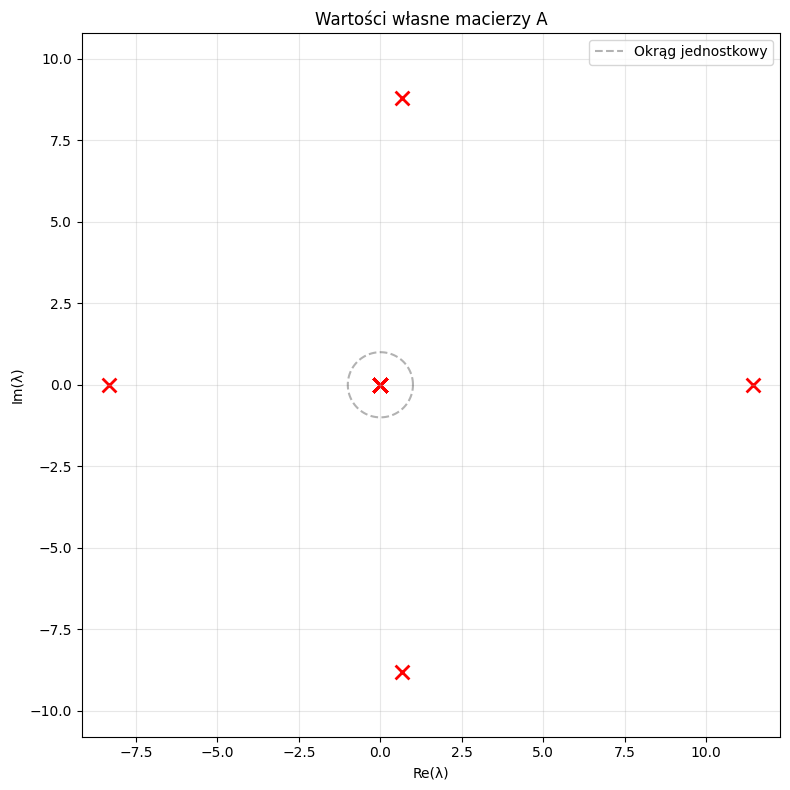


Maksymalna wartość |λ|: 11.430035
Układ jest NIESTABILNY (|λ| > 1)


In [12]:
# Wizualizacja wartości własnych na płaszczyźnie zespolonej
fig, ax = plt.subplots(figsize=(8, 8))

# Okrąg jednostkowy
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Okrąg jednostkowy')

# Wartości własne
ax.scatter(eigenvalues.real, eigenvalues.imag, s=100, c='red', marker='x', linewidths=2)

ax.set_xlabel('Re(λ)')
ax.set_ylabel('Im(λ)')
ax.set_title('Wartości własne macierzy A')
ax.grid(True, alpha=0.3)
ax.axis('equal')
ax.legend()

plt.tight_layout()
plt.show()

# Interpretacja stabilności
max_magnitude = np.abs(eigenvalues).max()
print(f"\nMaksymalna wartość |λ|: {max_magnitude:.6f}")
if max_magnitude < 1:
    print("Układ jest STABILNY (wszystkie |λ| < 1)")
elif max_magnitude == 1:
    print("Układ jest MARGINALNIE STABILNY (|λ| = 1)")
else:
    print("Układ jest NIESTABILNY (|λ| > 1)")

## 6. Podsumowanie

In [13]:
print("=" * 60)
print("PODSUMOWANIE - Wariant 11")
print("=" * 60)
print(f"\nDane wejściowe:")
print(f"  X: {X.shape} (stany początkowe)")
print(f"  X': {Xprime.shape} (stany końcowe)")

print(f"\nMacierz przekształcenia A:")
print(f"  Wymiary: {A.shape}")
print(f"  Metoda: SVD (pseudoodwrotność)")

print(f"\nJakość dopasowania:")
print(f"  Względny błąd Frobeniusa: {frobenius_error/frobenius_Xprime:.4%}")

print(f"\nAnaliza stabilności:")
print(f"  Max |λ|: {max_magnitude:.6f}")

print("\n" + "=" * 60)
print("MACIERZ A:")
print("=" * 60)
print(A)

PODSUMOWANIE - Wariant 11

Dane wejściowe:
  X: (23, 36) (stany początkowe)
  X': (23, 36) (stany końcowe)

Macierz przekształcenia A:
  Wymiary: (23, 23)
  Metoda: SVD (pseudoodwrotność)

Jakość dopasowania:
  Względny błąd Frobeniusa: 0.0000%

Analiza stabilności:
  Max |λ|: 11.430035

MACIERZ A:
[[ 3.523743e+00 -1.358566e+00  2.219261e+00 -7.554522e-01  2.760899e-01
   3.823677e+00  1.427714e+00  1.833221e+00  7.316445e-01  9.887322e-01
  -3.264539e+00  4.703218e+00  5.564148e-01 -4.228190e-01 -3.231232e-01
  -3.404978e+00 -1.683767e-01  1.890748e+00  2.561674e+00 -5.218737e-01
   1.746250e+00  1.514422e+00 -3.239688e+00]
 [ 2.619446e+00 -1.672301e+00  3.103559e-01 -5.342862e-01  3.286401e+00
   9.116462e-01  1.512785e+00  8.837394e-01  1.177881e+00  6.371301e-01
  -2.487650e+00  1.793741e+00  9.330749e-01 -8.827973e-01 -3.218002e-01
  -1.641964e+00  1.151094e+00 -7.752373e-01  1.192294e+00  4.917850e-01
   9.352420e-01  1.340333e+00  1.478536e+00]
 [ 3.460305e+00 -2.077068e+00  1.2

In [14]:
# Zapisz macierz A do pliku
np.savetxt('Macierz_A.csv', A, delimiter=';', fmt='%.10f')
print("Macierz A zapisana do pliku 'Macierz_A.csv'")

Macierz A zapisana do pliku 'Macierz_A.csv'
